 #  💦 Quality of water bodies - EDA 💦
![pic](https://ade.group/wp-content/uploads/2021/04/Water-Sampling-scaled.jpg)


> Water quality is one of the most important factors in a healthy ecosystem. Clean water supports a diversity of plants and wildlife.

> Scientists measure a variety of properties to determine water quality. These include temperature, acidity (pH), dissolved solids (specific conductance), particulate matter (turbidity), dissolved oxygen, hardness, and suspended sediment. Each reveals something different about the health of a water body.

# **1. Introduction**
**Libraries** 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import spacy
from wordcloud import WordCloud
import warnings
%matplotlib inline

# Read the .csv files 📁 and create a copy of the dataframe 📃 

> 📌 Note:
> - The [**file.csv**](https://it.wikipedia.org/wiki/Comma-separated_values) contains all the information we need to analyze the values of different factors that have an effect on the quality of water bodies. It contains 20 unique columns and 620 rows
> - I have created a **copy of the [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)** so that it can be used and modified without affecting the original file which could always serve as a backup.  

In [2]:
original_df = pd.read_csv('../input/water-quality-data-india/Water_pond_tanks_2021.csv', encoding='latin1')
original_df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245,5160,1.6,3.2,1.02,3.60,9,21,120,210
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599,1179,1.9,4.6,0.77,3.56,15,23,150,240
2,1790.0,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,18.0,24.0,4.2,6.0,7.2,8.2,28000,56900,2.4,2.8,1.20,1.64,3,3,47,150
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180,476,1.0,2.5,0.34,2.30,24,365,170,549
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496,734,1.0,2.3,0.35,1.00,43,289,240,727


> 📝 Let us use the **.info ()** function to view the  [**types of data**](https://realpython.com/python-data-types/) available in the dataset. 

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

* To continue the analysis process the data types have to be altered wherever required and the null values have to be removed. 

In [4]:
original_df=original_df.replace('-', np.nan)
original_df=original_df.replace('\n4', '',regex=True)
original_df=original_df.replace('\n', ' ',regex=True)
original_df.iloc[:,4:20]=original_df.iloc[:,4:20].astype(float)
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      618 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      618 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      615 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      615 non-null    float64

> - Let's continue our analysis by checking if there are any [**missing values**](https://en.wikipedia.org/wiki/Missing_data) and if so identify how many there are.

In [5]:
original_df.isnull().sum()

STN\nCode                             1
Name of Monitoring Location           0
Type Water Body                       0
State Name                            0
Temperature\n?C (Min)                 3
Temperature\n?C (Max)                 3
Dissolved Oxygen (mg/L) (Min)         2
Dissolved Oxygen (mg/L) (Max)         2
pH (Min)                              0
pH (Max)                              0
Conductivity (?mhos/cm) (Min)         5
Conductivity (?mhos/cm) (Max)         5
BOD (mg/L) (Min)                      2
BOD (mg/L) (Max)                      2
Nitrate N + Nitrite N(mg/L) (Min)    52
Nitrate N + Nitrite N(mg/L) (Max)    52
Fecal Coliform (MPN/100ml) (Min)     52
Fecal Coliform (MPN/100ml) (Max)     52
Total Coliform (MPN/100ml) (Min)     52
Total Coliform (MPN/100ml) (Max)     52
dtype: int64

In [6]:
df=original_df.copy(deep=True)

# **2. Easy Data Analysis 🔬**

# 2.1 Types of water bodies

> 📌 Note:
> Water bodies exist in many forms and they differ based of many essential factors.
**But which type of water body is found to be the largest in number ?**


> - First of all I created a new dataframe **dropping the missing values contained in the "Type Water Body" column**.

In [7]:
df_type_wb = df.dropna(subset=['Type Water Body'])


> - Secondly **I created a [list](https://www.w3schools.com/python/python_lists.asp#:~:text=%20Python%20Lists%20%201%20List.%20Lists%20are,Duplicates.%20%205%20List%20Length.%20%20More%20)** that contains all the types of water bodies in the column and their quantities. I continued by **creating a new dataframe** with the data in the new list.

In [8]:
colors_10 = ['DarkRed', 'FireBrick','Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black']
water_bodies_list = df_type_wb['Type Water Body'].str.split(',') #split the list into names
wb_type_list = {} #create an empty list
for types in water_bodies_list: # for any names in series_gen_list
    for type in types: # for any genre in genres
        if (type in wb_type_list): #if this genre is already present in the s_gen_list
            wb_type_list[type]+=1 # increase his value
        else:  # else
            wb_type_list[type]=1 # Create his index in the list
wb_type_df = pd.DataFrame(wb_type_list.values(),index = wb_type_list.keys(),
                        columns = {'Counts of types of water bodies'}) #Create a s_gen_df
wb_type_df.sort_values(by = 'Counts of types of water bodies',ascending = False,inplace = True) #Sort the dataframe in ascending order
top_10_wb_type = wb_type_df[0:10]

> - Finally, **I drew a bar chart** to better visualize how many different types of water bodies are available in the given dataset.

In [9]:
fig = go.Figure(data=[go.Bar(
    x = top_10_wb_type.index,
    y = top_10_wb_type['Counts of types of water bodies'],
    text = top_10_wb_type['Counts of types of water bodies'],
    textposition='auto',
    marker_color=colors_10
)])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text= 'How many different types of water bodies are available?',
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  yaxis=dict(
                  title='Quantity',
                  titlefont_size=14),
                  xaxis=dict(
                  title='Types of water bodies',
                  titlefont_size=14))

From the above bar chart it is evident that the type of water bodies present in larger number are **lakes** and fewer number are **wetlands.**

# 2.2 Water bodies in each state

So let's find out, which state has the most number of water bodies according to the given dataset. 

> - First I created a new dataframe **dropping the missing values contained in the "State Name" column**.

In [12]:
df_states = df.dropna(subset=['State Name'])

> - Secondly plot a treemap that contains squares of different shapes that illustrate the number of water bodies in each state

In [13]:
ax= px.treemap(df_states,path=["State Name"])
ax.show()

# **3. Factors affecting quality of water**

# 3.1  Temperature
> Water temperature is important to fish and aquatic plants. Temperature can affect the level of oxygen, as well as the ability of organisms to resist certain pollutants.

> - The missing values contained in the **"Temperature\n?C (Min)"** and **"Temperature\n?C (Max)"** columns are **dropped**.

In [14]:
df = df.dropna(subset=['Temperature\n?C (Min)', 'Temperature\n?C (Min)'])

>- The optimum **[temperature](https://www.thesprucepets.com/aquarium-water-temperature-1381896)** of freshwater bodies should approximatly be in the range **20°C to 30°C**.

In [15]:
df = df.loc[(df['Temperature\n?C (Min)'] >= 20)]
df = df.loc[(df['Temperature\n?C (Max)'] <= 30)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
0,4368.0,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,24.0,27.0,3.2,6.5,7.0,8.0,245.0,5160.0,1.6,3.2,1.02,3.60,9.0,21.0,120.0,210.0
1,2353.0,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,26.0,29.0,3.0,6.8,6.9,7.8,599.0,1179.0,1.9,4.6,0.77,3.56,15.0,23.0,150.0,240.0
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU RESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0


# 3.2 Dissolved Oxygen
> A small amount of oxygen, about ten molecules of oxygen per million molecules of water, is dissolved in water. Fish and microscopic organisms need dissolved oxygen to survive.

> - The missing values contained in the **"Dissolved Oxygen (mg/L) (Min)"** and **"Dissolved Oxygen (mg/L) (Max)"** columns are **dropped**.

In [16]:
df = df.dropna(subset=['Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)'])

>- The value of **[dissolved oxygen](https://themasterchemistry.com/factors-affecting-quality-of-water/)** should ideally be between **4 (mg/L) - 8 (mg/L)**.

In [17]:
df = df.loc[(df['Dissolved Oxygen (mg/L) (Min)'] >= 4)]
df = df.loc[(df['Dissolved Oxygen (mg/L) (Max)'] <= 8)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU RESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
6,4919.0,BRAMHASAGAR,Wetland,ANDHRA PRADESH,20.0,29.0,5.1,6.4,7.1,7.9,381.0,608.0,1.0,2.2,0.32,0.67,45.0,322.0,210.0,602.0
10,4934.0,INTERU SWAMPS,Wetland,ANDHRA PRADESH,25.0,26.0,6.1,7.5,7.3,7.9,16170.0,26800.0,2.4,2.8,1.12,1.80,3.0,3.0,63.0,150.0


# 3.3 pH
> The measurement of pH is a measure of the amount of hydrogen ions (H+) present in a substance such as water. Knowing the amount of hydrogen in a substance allows us to judge whether it is acidic, neutral, or basic.

> - The missing values contained in the **"pH (Min)"** and **"pH (Max)"** columns are **dropped**.

In [18]:
df = df.dropna(subset=['pH (Min)', 'pH (Max)'])

>- **[pH](https://cpcb.nic.in/water-quality-criteria/)** value ranges from **6 - 8** for optimum water quality.

In [19]:
df = df.loc[(df['pH (Min)'] >= 6)]
df = df.loc[(df['pH (Min)'] <= 8)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
4,4921.0,ANNAMAYYA PROJECT ON CHEYYERU RESERVOIR,Wetland,ANDHRA PRADESH,21.0,30.0,5.4,6.5,7.3,8.0,496.0,734.0,1.0,2.3,0.35,1.00,43.0,289.0,240.0,727.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
6,4919.0,BRAMHASAGAR,Wetland,ANDHRA PRADESH,20.0,29.0,5.1,6.4,7.1,7.9,381.0,608.0,1.0,2.2,0.32,0.67,45.0,322.0,210.0,602.0
10,4934.0,INTERU SWAMPS,Wetland,ANDHRA PRADESH,25.0,26.0,6.1,7.5,7.3,7.9,16170.0,26800.0,2.4,2.8,1.12,1.80,3.0,3.0,63.0,150.0


# 3.4 Conductivity
> Conductivity is a measure of water’s capability to pass electrical flow. Significantly elevated electrical conductivity can indicate that pollution has entered the river. A measure of electrical conductivity cannot tell you what the pollutant is, but it can help identify that there is a problem that may harm invertebrates and/or fish.
> - The missing values contained in the **"Conductivity (?mhos/cm) (Min)"** and **"Conductivity (?mhos/cm) (Max)"** columns are **dropped**.

In [20]:
df = df.dropna(subset=['Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)'])

>- **[Conductivity](https://friendsofthecarpriver.com/?page_id=962#:~:text=Freshwater%20streams%20ideally%20should%20have,to%20support%20diverse%20aquatic%20life.)** should ideally be between **150 - 500 μmhos/cm** to support diverse aquatic life.

In [21]:
df = df.loc[(df['Conductivity (?mhos/cm) (Min)'] >= 150)]
df = df.loc[(df['Conductivity (?mhos/cm) (Max)'] <= 500)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
44,2207.0,"BOR BEEL AT JAKAI., ASSAM",POND,ASSAM,21.0,25.0,4.0,7.0,7.2,7.8,200.0,297.0,2.0,2.8,0.60,1.10,300.0,730.0,610.0,1500.0
178,4535.0,GUBBALAL KERE,LAKE,KARNATAKA,25.0,25.0,4.8,6.4,6.5,7.7,247.0,371.0,3.0,11.0,0.40,0.80,1500.0,15000.0,16000.0,160000.0
230,3592.0,YEDIYUR LAKE,LAKE,KARNATAKA,25.0,25.0,4.1,7.1,6.5,8.2,201.0,334.0,3.0,18.0,0.60,2.40,4600.0,46000.0,24000.0,920000.0


# 3.5 Biochemical oxygen demand (BOD) 
> BOD is a measure of the amount of oxygen required to remove waste organic matter from water in the process of decomposition by aerobic bacteria (those bacteria that live only in an environment containing oxygen). Higher BOD indicates more oxygen is required, which is less for oxygen-demanding species to feed on, and signifies lower water quality. Inversely, low BOD means less oxygen is being removed from water, so water is generally purer.

> - The missing values contained in the **"BOD (mg/L) (Min)"** and **"BOD (mg/L) (Max)"** columns are **dropped**.

In [22]:
df = df.dropna(subset=['BOD (mg/L) (Min)', 'BOD (mg/L) (Max)'])

>- **[BOD](https://cpcb.nic.in/water-quality-criteria/)** has to be lower than **5 (mg/L)** to obtain moderately clean water.

In [23]:
df = df.loc[(df['BOD (mg/L) (Max)'] <= 5)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
44,2207.0,"BOR BEEL AT JAKAI., ASSAM",POND,ASSAM,21.0,25.0,4.0,7.0,7.2,7.8,200.0,297.0,2.0,2.8,0.60,1.10,300.0,730.0,610.0,1500.0
239,3675.0,B KATIHALLI KERE,TANK,KARNATAKA,21.0,27.0,5.4,6.7,7.4,7.9,290.0,450.0,2.0,2.4,0.30,0.30,110.0,140.0,920.0,1200.0
241,3664.0,BASAVANAHALLIKERE TANK,TANK,KARNATAKA,25.0,25.0,5.9,5.9,7.7,7.7,500.0,500.0,2.0,2.0,0.30,0.30,330.0,330.0,2200.0,2200.0


# 3.6 Nitrate & Nitrite
> Nitrate and nitrite are soluble compounds containing nitrogen and oxygen. In the environment, nitrite (NO2 - ) generally converts to nitrate (NO3 - ), which means nitrite occurs very rarely in groundwater. Nitrate is essential for plant growth and is present in all vegetables and grains. 

> - The missing values contained in the **"Nitrate N + Nitrite N(mg/L) (Min)"** and **"Nitrate N + Nitrite N(mg/L) (Max)"** columns are **dropped**.

In [24]:
df = df.dropna(subset=['Nitrate N + Nitrite N(mg/L) (Min)', 'Nitrate N + Nitrite N(mg/L) (Max)'])

>- The average of **[nitrate and nitrite](https://waterquality.montana.edu/well-ed/interpreting_results/fs_nitrate_nitrite.html#:~:text=The%20drinking%20water%20standard%20for%20nitrate%2DN%20is%2010.0%20mg,under%206%20months%20of%20age.)** should not exceed **5.5 (mg/L)**.

In [25]:
df = df.loc[(df['Nitrate N + Nitrite N(mg/L) (Max)'] <= 5.5)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
3,4391.0,"CHENGAMBAKAM TANK IN SRI CITY SEZ, TIRUPATHI",TANK,ANDHRA PRADESH,22.0,29.0,5.4,6.2,6.3,7.9,180.0,476.0,1.0,2.5,0.34,2.30,24.0,365.0,170.0,549.0
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
44,2207.0,"BOR BEEL AT JAKAI., ASSAM",POND,ASSAM,21.0,25.0,4.0,7.0,7.2,7.8,200.0,297.0,2.0,2.8,0.60,1.10,300.0,730.0,610.0,1500.0
239,3675.0,B KATIHALLI KERE,TANK,KARNATAKA,21.0,27.0,5.4,6.7,7.4,7.9,290.0,450.0,2.0,2.4,0.30,0.30,110.0,140.0,920.0,1200.0
241,3664.0,BASAVANAHALLIKERE TANK,TANK,KARNATAKA,25.0,25.0,5.9,5.9,7.7,7.7,500.0,500.0,2.0,2.0,0.30,0.30,330.0,330.0,2200.0,2200.0


# 3.7 Fecal Coliform 
> A fecal coliform is a facultatively anaerobic, rod-shaped, gram-negative, non-sporulating bacterium. Coliform bacteria generally originate in the intestines of warm-blooded animals. When levels are high there may be an elevated risk of waterborne gastroenteritis. 

> - The missing values contained in the **"Fecal Coliform (MPN/100ml) (Min)" and "Fecal Coliform (MPN/100ml) (Max)" columns are dropped**.

In [26]:
df = df.dropna(subset=['Fecal Coliform (MPN/100ml) (Min)', 'Fecal Coliform (MPN/100ml) (Max)'])

>- The value of **[fecal coliform](https://extension.psu.edu/coliform-bacteria)** should not exceed **200 MPN/100ml**.

In [27]:
df = df.loc[(df['Fecal Coliform (MPN/100ml) (Max)'] <= 200)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
239,3675.0,B KATIHALLI KERE,TANK,KARNATAKA,21.0,27.0,5.4,6.7,7.4,7.9,290.0,450.0,2.0,2.4,0.30,0.30,110.0,140.0,920.0,1200.0
295,3686.0,NIRASAGARAKERE TANK,TANK,KARNATAKA,24.0,25.0,7.3,7.6,7.5,8.2,326.0,438.0,1.0,2.5,0.32,0.92,2.0,14.0,10.0,32.0
302,4498.0,"SANAVALLI DAM, MUNGOD",TANK,KARNATAKA,23.0,28.0,7.1,7.4,6.8,7.3,163.0,251.0,2.2,2.7,0.30,0.79,2.0,8.0,19.0,31.0
334,1385.0,"SASTHAMCOTTA LAKE, KERALA",LAKE,KERALA,21.0,25.0,6.5,7.5,6.4,7.8,162.0,185.0,1.0,2.0,0.30,0.70,70.0,110.0,240.0,410.0


# 3.8 Total Coliform 
> Total Coliforms are a large group of different types of bacteria, that share several characteristics. The main sources of total coliforms in water is contamination from human and animal waste.
Total Coliforms are used as an indicator of the cleanliness of a water source.

> - The missing values contained in the **"Total Coliform (MPN/100ml) (Min)" and "Total Coliform (MPN/100ml) (Max)" columns are dropped**.

In [28]:
df = df.dropna(subset=['Total Coliform (MPN/100ml) (Min)', 'Total Coliform (MPN/100ml) (Max)'])

The **[total coliform (TC)](https://www.downtoearth.org.in/news/coliform-will-count-2933#:~:text=According%20to%20the%20ministry's%20norms,probable%20number)** including faecal coliform should not exceed **500 MPN/100 ml**.


In [29]:
df = df.loc[(df['Total Coliform (MPN/100ml) (Max)'] <= 500)]
df.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,Temperature\n?C (Min),Temperature\n?C (Max),Dissolved Oxygen (mg/L) (Min),Dissolved Oxygen (mg/L) (Max),pH (Min),pH (Max),Conductivity (?mhos/cm) (Min),Conductivity (?mhos/cm) (Max),BOD (mg/L) (Min),BOD (mg/L) (Max),Nitrate N + Nitrite N(mg/L) (Min),Nitrate N + Nitrite N(mg/L) (Max),Fecal Coliform (MPN/100ml) (Min),Fecal Coliform (MPN/100ml) (Max),Total Coliform (MPN/100ml) (Min),Total Coliform (MPN/100ml) (Max)
5,4936.0,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.0,23.0,6.8,7.5,7.1,9.0,158.0,320.0,1.2,2.2,0.42,1.79,3.0,4.0,63.0,150.0
295,3686.0,NIRASAGARAKERE TANK,TANK,KARNATAKA,24.0,25.0,7.3,7.6,7.5,8.2,326.0,438.0,1.0,2.5,0.32,0.92,2.0,14.0,10.0,32.0
302,4498.0,"SANAVALLI DAM, MUNGOD",TANK,KARNATAKA,23.0,28.0,7.1,7.4,6.8,7.3,163.0,251.0,2.2,2.7,0.30,0.79,2.0,8.0,19.0,31.0
334,1385.0,"SASTHAMCOTTA LAKE, KERALA",LAKE,KERALA,21.0,25.0,6.5,7.5,6.4,7.8,162.0,185.0,1.0,2.0,0.30,0.70,70.0,110.0,240.0,410.0
347,2142.0,"KALISINDH RESERVOIR AT SARANGPUR, RAJGARH",LAKE,MADHYA PRADESH,20.0,24.0,7.0,7.9,7.2,7.9,250.0,490.0,1.4,2.4,0.30,0.50,2.0,2.0,24.0,34.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 520
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           10 non-null     float64
 1   Name of Monitoring Location        10 non-null     object 
 2   Type Water Body                    10 non-null     object 
 3   State Name                         10 non-null     object 
 4   Temperature
?C (Min)               10 non-null     float64
 5   Temperature
?C (Max)               10 non-null     float64
 6   Dissolved Oxygen (mg/L) (Min)      10 non-null     float64
 7   Dissolved Oxygen (mg/L) (Max)      10 non-null     float64
 8   pH (Min)                           10 non-null     float64
 9   pH (Max)                           10 non-null     float64
 10  Conductivity (?mhos/cm) (Min)      10 non-null     float64
 11  Conductivity (?mhos/cm) (Max)      10 non-null     float64


> 📌 Note: 
>    After consider all the optimum values of the factors affecting the quality of water bodies, the dataset has been narrowed from **620 to 10 entries**.

# 4. State with the best water quality

> - **A [bar graph](https://plotly.com/python/bar-charts/)** is drawn to determine which state has the best water quality.

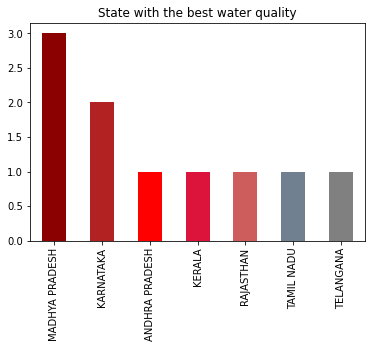

In [45]:
df['State Name'].value_counts()[:20].plot(kind='bar', color=['DarkRed', 'FireBrick','Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black'])
plt.title("State with the best water quality")
plt.show()

> **📌 Result**
>- From the above **bar chart** we can conclude that the water bodies in the state **Madhya Pradesh** are of the best quality.

# 5. Type of water body with the best quality

> - **A [bar graph](https://plotly.com/python/bar-charts/)** is drawn to determine the type of water body that has the best water quality.

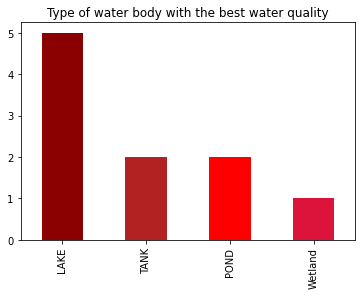

In [50]:
df['Type Water Body'].value_counts()[:20].plot(kind='bar', color=['DarkRed', 'FireBrick','Red', 'Crimson', 'IndianRed', 'slategray', 'gray', 'dimgrey', 'DarkSlateGrey', 'black'])
plt.title("Type of water body with the best water quality")
plt.show()

> **📌 Result**
> - From the above **bar chart** we can conclude that **lakes** have the best water quality.

# 6. Relation between different factors

In [36]:
new_df=original_df.copy(deep=True)

# 6.1 Dissolved Oxygen and temperature
* As **temperature** levels increase, the amount of **dissolved oxygen** in water decreases due to the **[inverse relationship](https://atlas-scientific.com/blog/how-does-temperature-affect-dissolved-oxygen/)** between dissolved oxygen and temperature.
![image.jpg](https://atlas-scientific.com/files/do-origin.jpg)

In [37]:
new_df = new_df.dropna(subset=['Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)', 'Temperature\n?C (Min)', 'Temperature\n?C (Min)'])

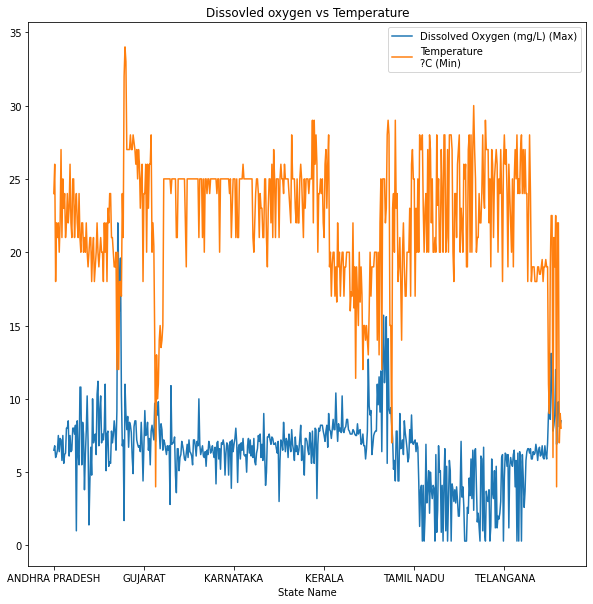

In [57]:
new_df.plot(x="State Name", y=["Dissolved Oxygen (mg/L) (Max)", "Temperature\n?C (Min)"],
        kind="line", figsize=(10, 10))
plt.title("Dissovled oxygen vs Temperature")
plt.show()

From the above-displayed plot, we can analyze the following:

* In the state of **Gujarat**, **Tamil Nadu** and **Telangana** the quality of water is best as it has the maximum value of dissolved oxygen even under the harsh condition of low temperatures.

# 6.2 Nitrate + Nitrite and dissolved oxygen
* **Excess [nitrates and nitrites](https://archive.epa.gov/water/archive/web/html/vms57.html)** can cause hypoxia (**low levels of dissolved oxygen**) and can become toxic to warm-blooded animals at higher concentrations (10 mg/L) or higher) under certain conditions.
![no](https://www.mdpi.com/water/water-14-00799/article_deploy/html/images/water-14-00799-g001.png)

In [39]:
new_df = new_df.dropna(subset=['Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)', 'Nitrate N + Nitrite N(mg/L) (Min)', 'Nitrate N + Nitrite N(mg/L) (Max)'])

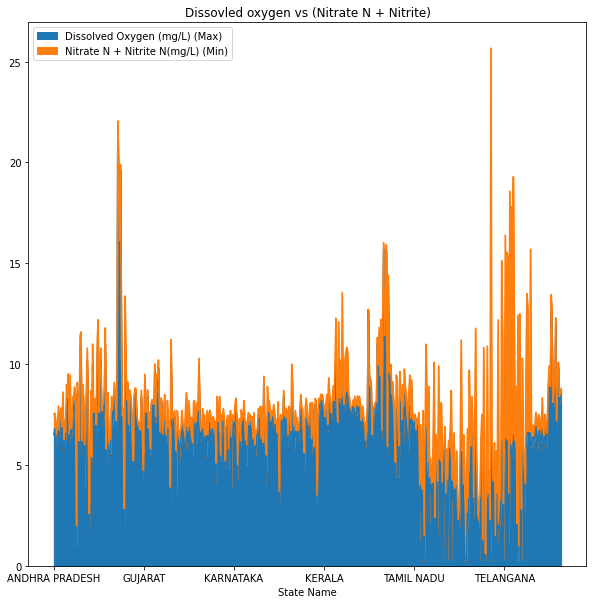

In [59]:
new_df.plot(x="State Name", y=["Dissolved Oxygen (mg/L) (Max)", "Nitrate N + Nitrite N(mg/L) (Min)"],
        kind="area", figsize=(10, 10))
plt.title("Dissovled oxygen vs (Nitrate N + Nitrite)")
plt.show()

From the above-displayed plot, we can analyze the following:

* In the state of **Gujarat** and **Tamil Nadu** the quality of water is best as it has the maximum value of dissolved oxygen even when there is a large concentration of nitrates and nitrites.